<center><h1><a href="https://www.kaggle.com/c/nlp-getting-started">Disaster Tweets</a></h1></center>
<hr>

# thanks to...

**Problem Asked**
> [nltk - POS Tag Information when lemmatizing](https://stackoverflow.com/questions/15586721/wordnet-lemmatization-and-pos-tagging-in-python)  
> [pandas - Using regex](https://kanoki.org/2019/11/12/how-to-use-regex-in-pandas/)  
> [pandas - Using regex and find all matching string](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.findall.html)  
> [pandas - Regex replace portion of string](https://stackoverflow.com/questions/2763750/how-to-replace-only-part-of-the-match-with-python-re-sub)  
> [NLP - How to use GloVe Embedding](https://medium.com/@sarin.samarth07/glove-word-embeddings-with-keras-python-code-52131b0c8b1d)  
> [NLP - Text to Sequence for untokenized word](https://medium.com/@bramblexu/why-tokenizer-in-keras-reserve-word-index-0-33b2c634cca2)  
> [tqdm - Visualizing for loop](https://tariat.tistory.com/421)  
> [keras - Functional API model compiling](https://keras.io/models/model/)  
> [keras - Possible Losses](https://keras.io/losses/)    

# table of contents <a id="top"></a>
1. [Define the Problem](#1)
2. [Gather the Data](#2)
3. [Prepare Data for Consumption](#3)
    1. [Import Library](#3.1)
    2. [Load Dataset](#3.2)
    3. [Data Cleaning](#3.3)
4. [Perform Exploratory Analysis with Statistics](#4)
5. [Model Data](#5)
    1. [Prepare Data](#5.1)
    2. [Embedding Weights](#5.2)
    3. [Data Modeling](#5.3)
    4. [Training](#5.4)
6. [Validate and Implement](#6)
<hr>

# 1. Define the Problem <a id="1"></a> 
<p style='text-align: right;'><a href="#top">🔝top</a></p>

[**Competition Description** - from Kaggle](https://www.kaggle.com/c/nlp-getting-started)<br> 
> ...<br> 
> In this competition, you’re challenged to build a machine learning model that predicts which Tweets are about real disasters and which one’s aren’t. You’ll have access to a dataset of 10,000 tweets that were hand classified. If this is your first time working on an NLP problem, we've created a quick tutorial to get you up and running.<br>
> ...<br>

# 2. Gather the Data <a id="2"></a> 
<p style='text-align: right;'><a href="#top">🔝top</a></p>

[**Data Description** - from Kaggle](https://www.kaggle.com/c/nlp-getting-started/data)
> **What should I expect the data format to be?**<br>
> Each sample in the train and test set has the following information:<br>
> * The text of a tweet<br>
> * A keyword from that tweet (although this may be blank!)<br>
> * The location the tweet was sent from (may also be blank)<br>
 
> **What am I predicting?**<br>
> You are predicting whether a given tweet is about a real disaster or not. If so, predict a 1. If not, predict a 0.<br>

> **Files**<br>
> train.csv - the training set<br>
> test.csv - the test set<br>
> sample_submission.csv - a sample submission file in the correct format<br>

> **Columns**<br>
> id - a unique identifier for each tweet<br>
> text - the text of the tweet<br>
> location - the location the tweet was sent from (may be blank)<br>
> keyword - a particular keyword from the tweet (may be blank)<br>
> target - in train.csv only, this denotes whether a tweet is about a real disaster (1) or not (0)<br>

# 3. Perpare Data for Consumption <a id="3"></a> 
<p style='text-align: right;'><a href="#top">🔝top</a></p>

## 3.1. Import Library <a id="3.1"></a> 
<p style='text-align: right;'><a href="#top">🔝top</a></p>

In [1]:
### Python Standard Library
import os
import re

### Sate Progress Bar
from tqdm import tqdm

### Natural Language Processing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag

### Dataframe
import pandas as pd

### Visualization
import matplotlib.pyplot as plt

### Numerical Data
import numpy as np

### Machine Learning
from sklearn.model_selection import train_test_split

### Deep Learning
import tensorflow as tf
import tensorflow.keras as keras

In [2]:
pd.options.display.max_columns = 499
pd.options.display.max_rows = 499
pd.options.mode.chained_assignment = None

In [3]:
data_path = os.path.join(os.getcwd(), 'nltk_data')
if os.path.exists(data_path):
    nltk.data.path.append(data_path)
else:
    nltk.download()

In [4]:
%matplotlib inline

## 3.2. Load Dataset <a id="3.2"></a> 
<p style='text-align: right;'><a href="#top">🔝top</a></p>

In [5]:
train_df = pd.read_csv('./data/train.csv', encoding='utf-8')
test_df = pd.read_csv('./data/test.csv', encoding='utf-8')

In [6]:
train_df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [7]:
test_df

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [10]:
train_df.describe(include='all')

,id,keyword,location,text,target
count,7613.000000,7552,5080,7613,7613.00000
unique,NaN,221,3341,7503,NaN
top,NaN,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...,NaN
freq,NaN,45,104,10,NaN
mean,5441.934848,NaN,NaN,NaN,0.42966
std,3137.116090,NaN,NaN,NaN,0.49506
min,1.000000,NaN,NaN,NaN,0.00000
25%,2734.000000,NaN,NaN,NaN,0.00000
50%,5408.000000,NaN,NaN,NaN,0.00000
75%,8146.000000,NaN,NaN,NaN,1.00000


In [11]:
test_df.describe(include='all')

,id,keyword,location,text
count,3263.000000,3237,2158,3263
unique,NaN,221,1602,3243
top,NaN,deluged,New York,11-Year-Old Boy Charged With Manslaughter of T...
freq,NaN,23,38,3
mean,5427.152927,NaN,NaN,NaN
std,3146.427221,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN
25%,2683.000000,NaN,NaN,NaN
50%,5500.000000,NaN,NaN,NaN
75%,8176.000000,NaN,NaN,NaN


In [12]:
train_df.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [13]:
test_df.isna().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

## 3.3. Data Cleaning <a id="3.3"></a> 
<p style='text-align: right;'><a href="#top">🔝top</a></p>

In [14]:
def combine_df(train, test):
    df = pd.concat([train, test], ignore_index=True)
    df['target'] = df['target'].astype('Int64')
    return df

In [15]:
combined_df = combine_df(train_df, test_df)
combined_df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
10871,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,<NA>
10872,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,<NA>
10873,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,<NA>
10874,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,<NA>


In [16]:
def split_df(df):
    train = df.loc[~df['target'].isna(), :].reset_index()
    test = df.loc[df['target'].isna(), :].reset_index()
    test = test.drop('target', axis=1)
    return train, test

In [17]:
train_df, test_df = split_df(combined_df)

In [18]:
train_df

,index,id,keyword,location,text,target
0,0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...,...
7608,7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [19]:
test_df

,index,id,keyword,location,text
0,7613,0,NaN,NaN,Just happened a terrible car crash
1,7614,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,7615,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,7616,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,7617,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...,...
3258,10871,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10872,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10873,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [20]:
def preprocess_text(df):
    ### lowercase
    df['text_cleaned'] = df['text'].str.lower()
    
    ### extrack link
    df['link'] = df['text_cleaned'].str.findall(r'(https?://[^\s]+|www.[^\s]+)')
    df['link'] = df['link'].apply(lambda link: ' '.join(link))
    df['text_cleaned'] = df['text_cleaned'].str.replace('https?://[^\s]+|www.[^\s]+', '', regex=True)
    
    ### extract hashtag
    df['hashtag'] = df['text_cleaned'].str.findall(r'#([^\s]+)')
    df['hashtag'] = df['hashtag'].apply(lambda hashtag: ' '.join(hashtag))
    df['text_cleaned'] = df['text_cleaned'].str.replace(r'#([^\s]+)', r'\1', regex=True)
    
    ### remove number
    df['text_cleaned'] = df['text_cleaned'].str.replace(r'[\d]', '', regex=True)

    ### remove non english character (punctuation and odd characters)
    df['text_cleaned'] = df['text_cleaned'].str.replace(r'[^a-zA-Z ]', '', regex=True)

    ### remove multiple space
    df['text_cleaned'] = df['text_cleaned'].str.replace(r'\s[\s]+', ' ', regex=True)
    
    ### stopwords
    stopword = stopwords.words('english')
    df['stopword'] = df['text_cleaned'].apply(lambda text: ' '.join([word for word in word_tokenize(text) if word in stopword])) 
    df['text_cleaned'] = df['text_cleaned'].apply(lambda text: ' '.join([word for word in word_tokenize(text) if word not in stopword]))

    ### lemmatization
    lemmatizer = WordNetLemmatizer()
    df['text_cleaned'] = df['text_cleaned'].apply(lambda text: ' '.join([lemmatizer.lemmatize(word, pos=pos[0].lower() if pos[0].lower() in ['n', 'v'] else 'n') for word, pos in pos_tag(word_tokenize(text))]))

    
    return df

In [21]:
combined_df = preprocess_text(combined_df)
combined_df

,id,keyword,location,text,target,text_cleaned,link,hashtag,stopword
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake may allah forgive u,,earthquake,our are the of this all
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,,,
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,resident ask shelter place notify officer evac...,,,all to in are being by no other or in are
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfire evacuation order calif...,,wildfires,in
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,get sent photo ruby alaska smoke wildfires pou...,,alaska wildfires,just this from as from into a
...,...,...,...,...,...,...,...,...,...
10871,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,<NA>,earthquake safety los angeles safety fastener ...,,,
10872,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,<NA>,storm ri worse last hurricane cityampothers ha...,,,in than my my it was
10873,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,<NA>,green line derailment chicago,http://t.co/utbxlcbiuy,,in
10874,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,<NA>,meg issue hazardous weather outlook hwo,http://t.co/3x6rbqjhn3,,


In [22]:
def get_vocab(text):
    words = set()
    for t in text:
        for word in word_tokenize(t):
            words.add(word)
    words = ['<pad>'] + list(sorted(words))
    
    word2idx = {word:idx for idx, word in enumerate(words)}
    idx2word = {idx:word for idx, word in enumerate(words)}
    
    return words, word2idx, idx2word

In [23]:
vocab, word2idx, idx2word = get_vocab(combined_df['text_cleaned'])
vocab

['<pad>',
 'aa',
 'aaaa',
 'aaaaaaallll',
 'aaarrrgghhh',
 'aaceorg',
 'aal',
 'aampb',
 'aampw',
 'aan',
 'aannnnd',
 'aapatwork',
 'aar',
 'aaron',
 'aarongoodwin',
 'aaronkearneyaus',
 'aaronthefm',
 'aashiqui',
 'aatraffic',
 'ab',
 'aba',
 'abandon',
 'abandonedpics',
 'abb',
 'abba',
 'abbandoned',
 'abbott',
 'abbruchsimulator',
 'abbswinston',
 'abbyairshow',
 'abbydphillip',
 'abc',
 'abcchicago',
 'abceyewitness',
 'abcfmelissajoey',
 'abcnetwork',
 'abcnews',
 'abcnewsbayarea',
 'abcnorio',
 'abdulrasheed',
 'abe',
 'abella',
 'aberdeen',
 'aberdeenfanpage',
 'aberdeenfc',
 'aberystwythshrewsbury',
 'abes',
 'abetter',
 'abh',
 'abha',
 'abia',
 'abide',
 'ability',
 'abject',
 'ablaze',
 'ablazeco',
 'able',
 'ableg',
 'abninfvet',
 'abnormally',
 'aboard',
 'abolish',
 'abomb',
 'abombed',
 'abombs',
 'abomination',
 'aboooooortiooooonnnnns',
 'aboriginal',
 'abort',
 'abortion',
 'abounds',
 'abouts',
 'aboveandbeyond',
 'abovewould',
 'abrancaballero',
 'abrianna',
 'abs

In [24]:
train_df_cleaned, test_df_cleaned = split_df(combined_df)

In [25]:
train_df_cleaned

,index,id,keyword,location,text,target,text_cleaned,link,hashtag,stopword
0,0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake may allah forgive u,,earthquake,our are the of this all
1,1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,,,
2,2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,resident ask shelter place notify officer evac...,,,all to in are being by no other or in are
3,3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfire evacuation order calif...,,wildfires,in
4,4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,get sent photo ruby alaska smoke wildfires pou...,,alaska wildfires,just this from as from into a
...,...,...,...,...,...,...,...,...,...,...
7608,7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,two giant crane hold bridge collapse nearby home,http://t.co/stfmbbzfb5,,a into
7609,7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,ariaahrary thetawniest control wild fire calif...,,,the out of in in the of the very
7610,7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,utckm volcano hawaii,http://t.co/zdtoyd8ebj,,m s of
7611,7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,police investigate ebike collide car little po...,,,after an with a in


In [26]:
test_df_cleaned

,index,id,keyword,location,text,text_cleaned,link,hashtag,stopword
0,7613,0,NaN,NaN,Just happened a terrible car crash,happen terrible car crash,,,just a
1,7614,2,NaN,NaN,"Heard about #earthquake is different cities, s...",heard earthquake different city stay safe ever...,,earthquake,about is
2,7615,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",forest fire spot pond goose flee across street...,,,there is a at are the i can not them all
3,7616,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,apocalypse light spokane wildfire,,spokane wildfires,
4,7617,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kill china taiwan,,,in and
...,...,...,...,...,...,...,...,...,...
3258,10871,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,earthquake safety los angeles safety fastener ...,,,
3259,10872,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,storm ri worse last hurricane cityampothers ha...,,,in than my my it was
3260,10873,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,green line derailment chicago,http://t.co/utbxlcbiuy,,in
3261,10874,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,meg issue hazardous weather outlook hwo,http://t.co/3x6rbqjhn3,,


In [27]:
train_text = train_df_cleaned['text_cleaned'].to_list()
train_label = np.asarray(train_df_cleaned['target'].to_list())
test_text = test_df_cleaned['text_cleaned'].to_list()

In [28]:
for t, l in zip(train_text, train_label):
    print(l, t)

1 deed reason earthquake may allah forgive u
1 forest fire near la ronge sask canada
1 resident ask shelter place notify officer evacuation shelter place order expect
1 people receive wildfire evacuation order california
1 get sent photo ruby alaska smoke wildfires pour school
1 rockyfire update california hwy close direction due lake county fire cafire wildfire
1 flood disaster heavy rain cause flash flood street manitou colorado spring area
1 im top hill see fire wood
1 there emergency evacuation happen building across street
1 im afraid tornado come area
1 three people die heat wave far
1 haha south tampa get flood hah wait second live south tampa gon na gon na fvck flooding
1 rain flood florida tampabay tampa day ive lose count
1 flood bago myanmar arrive bago
1 damage school bus multi car crash breaking
0 whats man
0 love fruit
0 summer lovely
0 car fast
0 goooooooaaaaaal
0 ridiculous
0 london cool
0 love skiing
0 wonderful day
0 looooool
0 wayi cant eat shit
0 nyc last week
0 lov

0 know say side effect low amp really fast son product acne cream side effect bloody diarrhea
0 ronda rousey would close make floyd mayweathers money fight bloody elbow boxing
0 im awful painting agree landscape bloody oil paint
0 need life sinis girlfrienddown ride till bloody endjust girlfriend
0 itsmegss think well bloody bark
0 eh hello cover bloody thighs bloody cleav eh hello since expose cleavage
0 mariasherwood johnjcampbell mega bloody marvellous
0 bloody mary sink beet juice
0 melrises gayler jessienojoke melissaross monty python date bloody far want go
0 meet bloody r
0 friday suppose happy day bloody friday hah zzzz
0 chxrmingprince jonesluna bloody hope say folding arm sit back chair
0 wait tell college friend reafs bloody mary drama cd
1 come kill indiansfor fun video smirk remorseless pakistani killer show boast
0 ive watch episode se bloody monday bloodymonday tvshowtime
0 marlon williams gt elvis presley gt marlon williams gt steel panther shuffle mode like bloody lege

0 rokiieee game officially collapse
1 great british bake offs back dorrets chocolate gateau collapse jan moir
0 still mortify go rose collapse heel face plant front everyone break fav shoe
0 hasnt collapse greek people still play fool tsipras cost wallybaiter
0 quora answer answer get collapsed others dont
0 almost collapse bc say wish come true moderately fuck
0 collapsed moment get home last night lol
1 flickershowell oh wow heart collapsed cool im cry cool cool
0 look collapse attempt munch endanger specie
1 apparently part building collapse hope everyone ok
1 xdescry wrong call trusty actually consider spontaneously collapse thats trusty
1 petition heartless owner whip horse collapse told keep animal act
0 collapsed thank u
0 like youtube video sqwizzix call duty piano entertainer ep musician collide
0 wave shall ripple collide tide love survive love lesleychappelle
0 somehow find collide
0 even star moon collide never want back life
0 step outside drink cigarette immediately lock 

1 happy one hurt wmata train derail also express bus much better metro rail foxnewsdc
0 adani amp modi plan mine derail australia court block huge indiabacked coal mine via yahoonews
1 dc medium tip get update derail wmata train today ask movie night quickly change subject
1 jozerphine literally look yeah derailed smithsonian everythign shut federal center sw mcpherson
0 use exactly national assembly honestly worthless derail
1 trustymclusty passenger derail train morning commute fcked go home
1 crocodile tear dont wash shes upset gravy train derail kidscompany
1 epicinsanity get derailed outside grimrail depot
1 update nopassenger metro train derails cause terrible delay morning derail train causing hell
1 stury note passenger board train derail morning
0 new illustration la time illustration subway
0 free name new doc newidea get back write wout derail think title wtwitter
1 whoa wmata train derail smithsonian
1 metro act chief jack requa say train derail sixcar train series rail car

1 u also fly bomb site world war ii warn letter tell people evacuate
1 mygc broken powerlines evacuate gold coast tram suspend service
1 sooo police dispatch say person threaten shoot walmart rutherford amp evacuate
0 summer program work go city pool evacuate one kid leave surprise jimmyfallon worstsummerjob
1 u govt refuse evacuate american yemen yemen usa evacuation abandon
1 ahhtheenikki tell respond today gunman quickly able evacuate ppl one shot
0 second bitch evacuate
1 california wildfire force thousand evacuate via youtube
1 pantalonesfuego yeah grow canyon la evacuate time
0 quick shut show take stage evacuate everyone mthe premise louis upset
1 meetkakarotto dont bother offline manage evacuate everyone include hinata go ahead cause
0 evacuate life
1 tonight quite interesting minute ago fire system go evacuate building
1 want everyone know emilee worried get milkshake suppose evacuate
1 fam evacuate bc need power
0 wow fifa pre season tournament career mode bloody hell evacuat

0 safety improvement make route buffalo harm good
0 inner man wayward route harm spend replace online survey qzloremft
0 anything happen fuck fly metlife hour away meampbeat crap try harm boy otratmetlife
1 never escape bullet dont harm nothing harm know pain know pain sometimes share someone like
0 standardized test harm child color via parentsacrossam cc billgates
0 know plan declare lord plan prosper harm plan
0 laurenmiller wont harm
0 angelstar obama feel responsible bring illegals family well protected harm feel heart others
0 ive meaning harm best way see fit
0 vilelunar trickshot regular controller fuck infinite fading harm gt
0 sex worker say credit card ban online ad harm good
0 someone harm angel
0 anyone harm boy would get take immediately security fan real quick
0 many security gards good dare let someone harm harry otrametlife
0 someone reblogged picture self harm scar oh please stop
0 wowsavannah whats harm theyre collectible
0 interview actor randy irwin ask could harm


0 dicehateme puppyshogun make sense paper beat rock paper come wood wood able support obliterate rock
0 people republic china proc abandon west philippine sea via changepilipinas
0 realdonaldtrump obliterate notion amp pattern political style seemly lead voter belief sarcasm narcissism richhomeydon swag usa like
0 fun instagramers jeb bush say earlier week want obliterate plan parenthood bu
0 souda leave lady sonia alone shall obliterate kneelbot
0 klavierstuk doesnt lvg force market may beat spur smaller team blind lcb top cl team obliterate u
1 whereas jez obliterate national debt give lot new benefit simply print money genius
0 lol plymouth let obliterate litter
0 accord prophecy also cnn mac tablet completely obliterate need gadget combine
0 josebasedgod im obliterate shadow realm
0 gop debate tonight jon stewart next week obliterate jonvoyage
1 mccainenl think spectacular look stonewall riot obliterate white house
1 watch sarah palin obliterate plan parenthood target minority woma

1 watch airport get swallow sandstorm minute
0 put sandstorm
1 watch airport get swallow sandstorm minute
1 watch airport get swallow sandstorm minute
1 watch airport get swallow sandstorm minute
1 come sandstorm tryout aug th lower woodlandms tryout pmhs tryout pm
1 watch airport get swallow sandstorm minute
0 villicanaalicia darude sandstorm
0 cant listen darude sandstorm without expect airhorns
0 play darude sandstorm radio edit
1 watch airport get swallow sandstorm minute
0 slam phone ground scream ahahahga
0 infinitegrace scream world much love little pony
0 update police seem like nice enough people felt bad transform scream dont worry theyre unconscious
0 someone gon na get screamed get lyric wrong lmao
0 scream sidjsjdjekdjskdjd cant stand
1 godofmischief lokis dagger pull jammed mina thigh mina scream grabbed leg sif
1 omfgdidnt expect drag first song pandora play omfg scream loudmy coworker scar
0 scream get microchip needle tbh would cry needle massive ya haram
0 heard steve

1 three israeli soldier wound west bank terrorist attack via rworldnews
1 rt abbswinston zionist terrorist kidnap palestinian overnight terror palestinian village
1 udhampuragain terrorist shot dead udhampur
1 lovemywife foxnews like shedid public fact journalist bush washard stop terrorist
1 isnt ironic anniversary hiroshima current president help terrorist nation acquire nuclear weapon traitor
1 rt abbswinston zionist terrorist kidnap palestinian overnight terror palestinian village
1 three israeli soldier wound west bank terrorist attack via rworldnews
0 dont say alipaper woman get problem keepingtheviginaclean thing interest n le expensive metrofmtalk
0 build share custom application within threatconnect w tc exchange infosec dfir threatintel
0 end australia best burger via newscomauhq
0 kinggerudo largest moblins hed leave biggest one red fire one strike already threat reduce gt
0 white american biggest threat world duh
0 warn expect threat soul
0 generational british schism priva

In [29]:
for t in test_text:
    print('?', t)

? happen terrible car crash
? heard earthquake different city stay safe everyone
? forest fire spot pond goose flee across street save
? apocalypse light spokane wildfire
? typhoon soudelor kill china taiwan
? shakingits earthquake
? theyd probably still show life arsenal yesterday eh eh
? hey
? nice hat
? fuck
? dont like cold
? nooooooooo dont
? dont tell
? 
? awesome
? birmingham wholesale market ablaze bbc news fire break birminghams wholesale market
? sunkxssedharry wear short race ablaze
? previouslyondoyintv toke makinwas marriage crisis set nigerian twitter ablaze
? check nsfw
? psa im split personality techie follow ablazeco burner follow ablaze
? beware world ablaze sierra leone amp guap
? burn man ablaze turban diva via etsy
? dis song people take thing run smh eye opener though set game ablaze cyhitheprynce
? rape victim die set ablaze yearold girl die burn injury set ablaze
? set ablaze
? ctvtoronto bin front field house wer set ablaze day flame go rite hydro pole wonder
?

? oh god send thought sastars head coach dan hughes leave game stretcher danielle robinson collide
? alyssaspencer remember beau collide slip slide die
? ok two favorite thing collide one great ht literarycakes
? call car v feed ex truck head collision mile marker prayer family get scene
? motorcyclist bicyclist injure denver collision broadway
? motorcyclist bicyclist injure denver collision broadway least two people take local
? traffic collision ambulance enroute florin rd franklin blvd south sac
? denver post motorcyclist bicyclist injure denver collision broadway
? collision daaamn
? marin sr sr trfc collisionunkn inj
? riverside n sr e con n sr w con trfc collisionunkn inj
? techerit anti collision rear gadget technology
? anti collision rear innovation gadget
? mom fight recover hospital fiery car crash kid miss home
? citation billing police officer cause broadwater crash
? little angel banjo pilon die skateboard crash wamberal weekend yearold b
? lol guy whip double yellow lin

? ukraine kyiv news radio free europeradio liberty ukraine famine monument erect kiev ukrainian ua
? nonsense gtgt famine memory strong exaggeration ukrainian msmukraine russia sanction
? would rather dwell land famine god perfect rest confines egypt
? miner strike botha apartheid sa tutu nobel prize ira bomb brighton famine ethiopia feel like yesterday
? russian food crematorium provoke outrage amid crisis famine memory via reuters
? protester mark year since fatal police shoot walmart ap
? police investigate fatal shoot highway
? success final failure fatalit courage continue count
? yearold boy charge manslaughter toddler report yearold boy charge manslaughter fatal sh
? yearold boy charge manslaughter toddler report yearold boy charge manslaughter fatal sh
? trim error lead fatal greek f crash nato safety investigation board report determine
? photo need put feeling social mediathe result could fatal message
? ladyshaxx freak awesome
? seatbelt really save people man alot fatal rec

? bihar assembly fail transact business due pandemonium
? ill sfa soonpandemonium
? move saturday gt mirage n west st raleigh nc ticket
? pandemonium aba woman delivers baby without face photo accord eye witness ogbor hill
? panic sublime rome
? kayhow may panic attack coinflip
? sixsecondcov sound like panic disco
? tried getfeelings deathinvading panic spawnscant concentrateno relatesstealing lightspreading thin soul section
? dont blame messenger food panic venezuela minute videothanks shtfplan
? puzzledtriangle please inform date song accurately reflect panic week
? add video youtube playlist panic disco write sin tragedy official video
? panic attack always lovely
? play roppongi panic pm candydulfer listen buy
? confession smoke whole bowl holy meca panic attack
? someone hold hand tell okay panic attack reason
? send kid college dont panic check cop tip rabbisocial worker
? add video youtube playlist panic disco ballad mona lisa official video
? underrrtow molly send help im pan

In [30]:
train_text, validation_text, train_label, validation_label = train_test_split(
    train_text,
    train_label,
    test_size=0.1
)

In [31]:
print('Length of Train: {}'.format(len(train_text)))
for t, l in zip(train_text, train_label):
    print(l, t)

Length of Train: 6851
1 michael talk electrocuted omg rowysolouisville
1 strict liability context airplane accident
0 dorette thats name mudslide cake maker
0 emaaalay thank dont city wide curfew
1 davidjordan stephanenny except dont know start riot even make sense credit particular individual
1 tinybaby adultblackmale mattytalks meltdown mwednesday
0 tomdean he alright hazardwillian aint gon na shift easily
1 three israeli soldier wound west bank terrorist attack via rworldnews
1 police officer wound suspect dead exchange shot richmond police officer wound suspect kill exchange gunfire
1 video pick body water rescuer search hundred migrant mediterran
1 bbclaurak one talk risk suicide bomber hide amongst migrant stow aboard eurotunnel train
1 hundred migrant fear drowned libya migrant stand next tent camp set near calais
1 global nuclear reactor construction market grow
1 dirknomissski yea someone faint panic thats basic stuff
0 review dude bro party massacre iii patrick bromleythe tit

1 destroy reg c competitiveness entire region b oversaturated yes brockton get regc commonwealth ppc
1 omg nixon live richard nixon tricky dicky right picture isnt hiding calgary
1 soloquiero maryland mansion fire kill cause damage plug christmas tree report say flame firefighte
1 kendall jenner nick jonas date world might quite literally explode
0 like youtube video iamrrsb minecraft skywars blaze que usa hack e flechadas sinistras
1 video pick body water rescuer search hundred migrant mediterranean boat carryi
0 ignition knock detonation sensorsenso standard fit acura rsx
1 builder dental emergency ruin plan emotionally blackmail afternoon bump
0 governor allow parole california school bus hijacker fresno link local network
0 micom summer contrast candy color bowknot cross body tote shoulder bag womengirls micom zip po
0 couple le sex fear itll let internet movie book say sex ought p
0 daborsch really shock blizzard lure old fanbase back wod disappointed u hardcore everyones leave
0 

1 russian food crematorium provoke outrage amid crisis famine memory
1 kick hurricane seriously simple website look seriously simple program
1 bbsnews latest palestine amp israel six palestinian kidnap west bank hebron home demolish
1 rt nlmdimrc deluge resource flood medical provider cleanup worker amp
0 brunette beauty night stretch victorian sofa view download video
0 look like mudslide like chew rubber gbbo
0 like youtube video spyro texture hack desolate garden ingame
0 christinalavv lindsaywynn saw tweet feel really attack
1 tflbusalerts tflbusalerts drive ilford close way emergency service deal call bus stuck
0 wish could get victoria secret front im good
1 watch airport get swallow sandstorm minute
1 video pick body water rescuer search hundred migrant mediterran
0 fkhanage look shad forsythe do year wont many injury inevitably injury like others
1 map typhoon soudelors predict path approach taiwan expect make landfall southern china
1 wreckage conclusively confirm mh malaysia 

0 hurricane dancer first caribbean pirate shipwreckmargarita engle henry holt co byr
0 icaseit mfi certify lightning cable
0 triumphant moment cook two egg easy yolk casualty
1 still cant get thunderstormtornado wake yesterday half street still dark
0 stop fucking say whole nother sound fucking stupid fuck mean whole fucking tonguetwister
0 giveaway music kit dren death head demolition
1 one direction pick fan army directioners x
0 world class tgirl as scene pandemonium
0 usually never happen
0 scream different language
1 year atomic bomb japan still struggle war past anniversary devastation wrought b
0 lightningwolf really activity directory p
1 univsfoundation people die human experiment unit japanese military
1 rcmp reporting fatality serious injury result collision tch near whitbourne
0 night blow rq
0 schelbertgeorg thanks im teach online class amp ask student lot question like sorry deluge ren art
1 u record hurricane drought united state hasnt hit major hurricane past nine year 

1 usatoday today frontpage bioterror lab face secret sanction rickperry doesnt make cut foxnew
1 make anthony bed consider destroy everytime fall asleep smh
1 investigator say virgin galactic spaceship crash cause structural failure copilot unlock braking system
0 im mom friend still see friend little baby care else theyll electrocute
0 last chance animal rescue new post animalrescue
0 onthisday mayflower set sail new world read laphamsquart
1 big issue leave undone get home adverse weather hit gotriangle real emergency plan place
0 indepth look new world work young people business economy cop huge upheaval
0 rene ablaze amp jacinta secret k fall sky edit mar
0 ronda rousey would close make floyd mayweathers money fight bloody elbow boxing
0 stuart broad take eight joe root run riot aussie stuart broad take careerbest figure
0 drake body bag meek must hit sensitive spot talk ghostwriter try end career
0 drake spoke rep raptorsbeg differ night shot ring musik wasnt goodlookrunning panic

1 group florida forest service firefighter could deploy california help contain fire detail
1 c specially modify land stadium rescue hostage iran
0 thats planet lone audience apocalypse
1 update survive canoe may fastest feed history though
0 davidcovucci cant sinkhole swallow every taco place neighborhood
0 ever since kelly burn keep dream inside burning building
1 check malaysia confirm plane wreckage flight mh
0 mechamacgyver wow bet get blame huh
0 reason love woman military lulgzimbestpicts
0 get win landslide perfect word cause get mud
0 coastal german shepherd rescue oc share link animalrescue
1 two air ambulance scene serious crash two car lorry emsne
0 come land engulfed tribal war turn land peace ie madinah prophetmuhammad islam
0 bruh white people buy ugliest shoe super tight blood go foot
1 cape coral city leader take part mock hurricane training
1 woman gps app guide rescuer injured biker marin county sfgate
0 adanne kindly follow back
0 august daily horoscope relationship

0 emmerdale ill devastate cainsuch great character
0 nowplaying sink fast never north east unsigned radio listen
1 osp concern mount fatality
1 wocowae officer wound suspect kill exchange gunfire ushed
1 nbcnightlynews malaysian official say debris find reunion island mh billneelynbc report
0 worst voice ever hear nikki trouble voice mom
0 blonde teen courtney laudner tease panty view download video
0 tinyjecht another standuser detonate killer queen
0 irandeal member congress dont want deal dont kid would b come home body bag war make money
0 bv bloomberg publish anything negative try derail public support favor irandeal
1 fire way close wtf go
0 repped fantastic laura milne thejonesesvoice liguistic need thats tongue twister tweet
1 detonation fashionable mountaineer electronic watch waterresistant couple leisure tab
1 child myanmar face double catastrophe flood hit
1 nigga play thunderstorm hope lorr bless em
0 mrsbinker emiliorivera davidlabrava mine diesel twister small breed stro

1 malik saadthe best police officer produce kpdied suicide bomb jan brother kppolice
0 many thx share comment alex lightman evidence take take
0 drown girl caitlin r kiernan centipede press sign numbered limited full
0 kid inundate image information online medium way deconstruct kerri sackville tm
0 id like think im photogenic every time see pic think gosh disaster xd
0 purple heart vet find jihad threat car mall islamaphobe vet
0 see virtual tour one listing fir st cannon beach list dorrie caruana
1 many train derail wmata shut orangeblue dc avenger make le mess unsuckdcmetro
0 reject law misguide false prophet imprison nation fuel self annihilation
1 acc study conduct skim morethan population kashmir suffer psychiatric disorder kashmirconflict
0 holy crap kingmyth phone explode haha
1 mariah get thick shoulder poor girl
1 news water main break disrupts trolley service
0 auntiedote rioslade lockewiggins akarb one side set obliteration govt fix thats far
0 im drown spirit wash
1 suicid

0 cwheate hahaha im half traumatise half hop labour easy
0 aptlyengineerd curfew
0 like youtube video noahj gta suicide sticky bomber gta online funny moment
1 allenenbot mess gon na explode
0 moth hold hostage yesterday chill bathroom windowsill day im okay
1 stormchase violent record break ef el reno oklahoma tornado nearly run
0 call weekend call bloody mary time summer full new
1 adventure mineness famine
1 strongly condemn attack ary news team karachi cowardly act simply try job
0 zhenghxn try eye akame ga kill tokyo ghoul damn bloody dont dare watch
0 teahivetweets would get inundated
0 message send dont reply see saw message least tell fuck something
1 three israeli soldier wound west bank terrorist attack via rworldnews
1 bettyfreedoms abninfvet hillary mass murderer
0 mmmmmm im burn im burning building im build oooooohhhh oooh ooh
1 report motor vehicle accident curry herman rd near stephenson involve overturn vehicle please use
1 year hiroshima nagasaki consequence nuclear de

In [32]:
print('Length of Validation: {}'.format(len(validation_text)))
for t, l in zip(validation_text, validation_label):
    print(l, t)

Length of Validation: 762
0 hermancranston atk letsfootball rt skanndtyagi letsfootball atk wire fire burn
1 trulystings yo dm
1 report hit amp runin roadwayproperty damage statesville rd
0 grill school function one grill go pretty much either forest fire inbetween make work
1 bloody insomnia grrrr insomnia
0 smoker ruin new car smell
1 remove linkury browser hijacker
1 ahmazing story power animal rescuer starve homeless dog future rescue person
0 bradleybrad saw fast af great damage upgrade shitton use exclusively whole playthrough
1 durrellb price insane dollar collapse u punish u thanks info
0 badastronomer lot trouble get student adult understand moon farther away think
1 latest home raze northern california wildfire
1 colorado news motorcyclist bicyclist injure denver collision broadway least two people tak
0 romantic dramatic never panic original sensei write rhyme attic
0 dont mess daddy massacre becarefulharry
1 u record hurricane drought
0 finnish hip hop pioneer paleface resc

0 sure burn calorie eat giant bowl mac cheese totally earned calorie klondike bar
0 foxnewsinsider obama give false time schedule iran test first bomb bomb nuclear suicide vest
0 quotesttg save panic get helios
1 break isi claim responsibility mosque attack saudi arabia kill
1 news fedex longer transport bioterror germ wake anthrax lab mishap say fedex tcot
0 hour bag grocery ache body
1 npzp mhtwfnetofficials alabama home quarantine possible ebola case abc news
1 usnwsgov severe weather statement issue august pm edt nw severe thunderstorm warning
0 get evacuate cinema min inside outkill please
0 there fire truck parking lot
0 parksboardfacts first zippoline one want use community never ask blight park moveit
1 kellkane thanks narrowly avert death fun youre right
0 mango juice crush icegtgtgtgt
0 elsa gon na end get electrocuted shes gon na end like cat christmas vacation
0 say yosemite sam drumpf nobody ill vote flatten rabbit skin ahuh huh always say
0 still echo scream
1 wreckage co

# 4. Perform Exploratory Data Analysis <a id="4"></a> 
<p style='text-align: right;'><a href="#top">🔝top</a></p>

# 5. Model Data <a id="5"></a> 
<p style='text-align: right;'><a href="#top">🔝top</a></p>

## 5.1. Prepare Dataset <a id="5.1"></a> 
<p style='text-align: right;'><a href="#top">🔝top</a></p>

In [33]:
SEQUENCE_LENGTH = 30
N_TRAIN = train_label.shape[0]
BATCH_SIZE = 64
EPOCHS = 30
ITERATIONS = N_TRAIN // BATCH_SIZE

In [34]:
def train_tokenizer(text):
    tokenizer = keras.preprocessing.text.Tokenizer(oov_token='UNK')
    tokenizer.fit_on_texts(text)
    return tokenizer

In [35]:
tokenizer = train_tokenizer(train_text)

In [36]:
tokenizer.texts_to_sequences(['s ssssssss s']) # ssssssss is not in tokenizer index

[[6007, 1, 6007]]

In [37]:
tokenizer.index_word

{1: 'UNK',
 2: 'get',
 3: 'like',
 4: 'fire',
 5: 'im',
 6: 'amp',
 7: 'go',
 8: 'u',
 9: 'new',
 10: 'via',
 11: 'dont',
 12: 'say',
 13: 'one',
 14: 'people',
 15: 'bomb',
 16: 'news',
 17: 'kill',
 18: 'video',
 19: 'make',
 20: 'time',
 21: 'disaster',
 22: 'emergency',
 23: 'flood',
 24: 'crash',
 25: 'attack',
 26: 'come',
 27: 'burn',
 28: 'body',
 29: 'year',
 30: 'see',
 31: 'police',
 32: 'look',
 33: 'take',
 34: 'day',
 35: 'would',
 36: 'home',
 37: 'family',
 38: 'still',
 39: 'love',
 40: 'think',
 41: 'know',
 42: 'building',
 43: 'train',
 44: 'storm',
 45: 'california',
 46: 'back',
 47: 'want',
 48: 'suicide',
 49: 'watch',
 50: 'collapse',
 51: 'man',
 52: 'car',
 53: 'bag',
 54: 'death',
 55: 'first',
 56: 'world',
 57: 'life',
 58: 'rt',
 59: 'cause',
 60: 'cant',
 61: 'scream',
 62: 'need',
 63: 'nuclear',
 64: 'work',
 65: 'two',
 66: 'war',
 67: 'pm',
 68: 'let',
 69: 'wreck',
 70: 'youtube',
 71: 'plan',
 72: 'hiroshima',
 73: 'today',
 74: 'dead',
 75: 'live'

In [38]:
def text_to_valid_sequence(text, maxlen=SEQUENCE_LENGTH, tokenizer=tokenizer):
    sequence = tokenizer.texts_to_sequences(text)
    sequence = keras.preprocessing.sequence.pad_sequences(
        sequence, 
        maxlen=maxlen, 
        padding='post', 
        truncating='post'
    )

    return sequence

In [39]:
train_sequence = text_to_valid_sequence(train_text)
validation_sequence = text_to_valid_sequence(validation_text)
test_sequence = text_to_valid_sequence(test_text)

In [40]:
train_sequence.shape

(6851, 30)

In [41]:
validation_sequence.shape

(762, 30)

In [42]:
test_sequence.shape

(3263, 30)

In [43]:
train_sequence

array([[ 1240,   461,  2679, ...,     0,     0,     0],
       [ 3460,  3461,  2680, ...,     0,     0,     0],
       [ 5116,   146,   481, ...,     0,     0,     0],
       ...,
       [ 1221,  1617,   645, ...,     0,     0,     0],
       [ 1305,  4747,   496, ...,     0,     0,     0],
       [   38,   130, 13945, ...,     0,     0,     0]], dtype=int32)

In [44]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_sequence, train_label))
train_dataset = train_dataset.shuffle(N_TRAIN)
train_dataset = train_dataset.prefetch(tf.data.experimental.AUTOTUNE)
train_dataset = train_dataset.batch(BATCH_SIZE)
train_dataset = train_dataset.repeat()

In [45]:
validation_dataset = tf.data.Dataset.from_tensor_slices((validation_sequence, validation_label))
validation_dataset = validation_dataset.prefetch(tf.data.experimental.AUTOTUNE)
validation_dataset = validation_dataset.batch(BATCH_SIZE)

In [46]:
test_dataset = tf.data.Dataset.from_tensor_slices((test_sequence))
test_dataset = test_dataset.prefetch(tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE)

## 5.2. Embedding Weights <a id="5.2"></a> 
<p style='text-align: right;'><a href="#top">🔝top</a></p>

In [47]:
VOCAB_SIZE = len(tokenizer.word_index) + 1
EMBEDDING_DIM = 100

In [48]:
def load_embedding(path='./data/glove/glove.6B.100d.txt'):
    embedding_vector = dict()
    with open(path) as f:
        for line in tqdm(f):
            value = line.split()
            word = value[0]
            coef = np.array(value[1:], dtype='float32')
            embedding_vector[word] = coef
    return embedding_vector

In [49]:
embedding_vector = load_embedding('./data/glove/glove.6B.100d.txt')

400000it [00:11, 36090.77it/s]


In [50]:
embedding_vector['a'].shape

(100,)

In [51]:
def initialize_embedding_weights(tokenizer=tokenizer, embedding_vector=embedding_vector):
    embedding_matrix = np.zeros((VOCAB_SIZE, EMBEDDING_DIM))
    for word, idx in tqdm(tokenizer.word_index.items()):
        embedding_value = embedding_vector.get(word)
        if embedding_value is not None:
            embedding_matrix[idx] = embedding_value
    return embedding_matrix

In [52]:
embedding_matrix = initialize_embedding_weights()

100%|██████████| 13945/13945 [00:00<00:00, 562821.82it/s]


In [53]:
embedding_matrix.shape

(13946, 100)

## 5.3. Data Modeling <a id="5.3"></a> 
<p style='text-align: right;'><a href="#top">🔝top</a></p>

In [54]:
LEARNING_RATE = 3e-05

In [55]:
class DisasterTweetModel(keras.Model):
    def __init__(self, vocab_size, embedding_dim, input_length):
        super(DisasterTweetModel, self).__init__()
        
        self.embedding = keras.layers.Embedding(
            vocab_size, 
            embedding_dim,
            input_length=input_length,
            weights=[embedding_matrix],
            trainable=False,
            name='embedding'
        )
        
        self.bi_lstm1 = keras.layers.Bidirectional(keras.layers.LSTM(64), name='lstm1')
        self.dropout1 = keras.layers.Dropout(0.5, name='dropout1')

        self.dense2 = keras.layers.Dense(1, activation='sigmoid', name='dense2')
        
    def call(self, inputs, training=None):
        inputs = self.embedding(inputs)

        layer1 = self.bi_lstm1(inputs)
        layer1 = self.dropout1(layer1)

        outputs = self.dense2(layer1)
        
        return outputs

In [56]:
model = DisasterTweetModel(VOCAB_SIZE, EMBEDDING_DIM, SEQUENCE_LENGTH)
temp = keras.Input((SEQUENCE_LENGTH))
model(temp)
model.summary()

Model: "disaster_tweet_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 30, 100)           1394600   
_________________________________________________________________
lstm1 (Bidirectional)        (None, 128)               84480     
_________________________________________________________________
dropout1 (Dropout)           (None, 128)               0         
_________________________________________________________________
dense2 (Dense)               (None, 1)                 129       
Total params: 1,479,209
Trainable params: 84,609
Non-trainable params: 1,394,600
_________________________________________________________________


In [57]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [58]:
lr_decay = keras.optimizers.schedules.ExponentialDecay(LEARNING_RATE, 10, 0.8)
lr_callback = keras.callbacks.LearningRateScheduler(lr_decay, verbose=1)

## 5.4. Training <a id="5.4"></a> 
<p style='text-align: right;'><a href="#top">🔝top</a></p>

In [59]:
history = model.fit(
    train_dataset, 
    epochs=EPOCHS, 
    steps_per_epoch=ITERATIONS, 
    callbacks=[lr_callback], 
    validation_data=validation_dataset, 
    verbose=1
)

Train for 107 steps, validate for 12 steps

Epoch 00001: LearningRateScheduler reducing learning rate to tf.Tensor(3e-05, shape=(), dtype=float32).
Epoch 1/30
107/107 [==============================] - 5s 46ms/step - loss: 0.6716 - accuracy: 0.6002 - val_loss: 0.6554 - val_accuracy: 0.6627

Epoch 00002: LearningRateScheduler reducing learning rate to tf.Tensor(2.9337982e-05, shape=(), dtype=float32).
Epoch 2/30
107/107 [==============================] - 2s 21ms/step - loss: 0.6530 - accuracy: 0.6551 - val_loss: 0.6365 - val_accuracy: 0.7152

Epoch 00003: LearningRateScheduler reducing learning rate to tf.Tensor(2.8690574e-05, shape=(), dtype=float32).
Epoch 3/30
107/107 [==============================] - 2s 22ms/step - loss: 0.6309 - accuracy: 0.6929 - val_loss: 0.6060 - val_accuracy: 0.7467

Epoch 00004: LearningRateScheduler reducing learning rate to tf.Tensor(2.8057453e-05, shape=(), dtype=float32).
Epoch 4/30
107/107 [==============================] - 2s 21ms/step - loss: 0.5715 - 

# 6. Validate and Implement<a id="6"></a> 
<p style='text-align: right;'><a href="#top">🔝top</a></p>

In [61]:
def plot_history(train_metric, val_metric, mode='accuracy'):
    assert mode in ['accuracy', 'loss']
    
    epochs = range(1, EPOCHS + 1)
    
    plt.plot(epochs, train_metric, label='train')
    plt.plot(epochs, val_metric, label='validation')
    
    plt.legend()
    plt.title('History of {}'.format(mode))
    plt.xlabel('epochs')
    plt.ylabel(mode)
    plt.show()

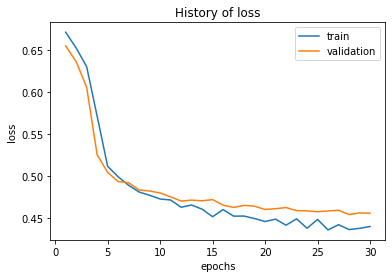

In [62]:
plot_history(history.history['loss'], history.history['val_loss'], mode='loss')

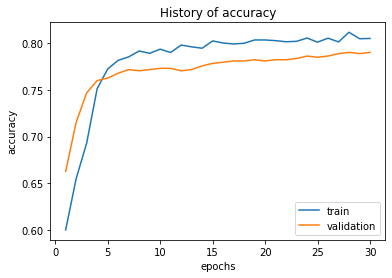

In [66]:
plot_history(history.history['accuracy'], history.history['val_accuracy'], mode='accuracy')

In [67]:
model.save_weights('./models/DisasterTweetv3/DisasterTweetModel')

In [75]:
prediction = model.predict(test_sequence)
prediction

array([[0.93671113],
       [0.7244795 ],
       [0.949837  ],
       ...,
       [0.54065454],
       [0.39777398],
       [0.392781  ]], dtype=float32)

In [76]:
submission = pd.read_csv('./data/sample_submission.csv', encoding='utf-8')
submission

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0
...,...,...
3258,10861,0
3259,10865,0
3260,10868,0
3261,10874,0


In [86]:
submission['target'] = prediction
idx = submission['target'] > 0.5
submission.loc[idx, 'target'] = 1
submission.loc[~idx, 'target'] = 0
submission['target'] = submission['target'].astype('int64')
submission

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,0


In [88]:
submission.to_csv('./data/submission/submission-v3.csv', index=False, encoding='utf-8')